In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
from scipy.cluster.hierarchy import dendrogram, linkage

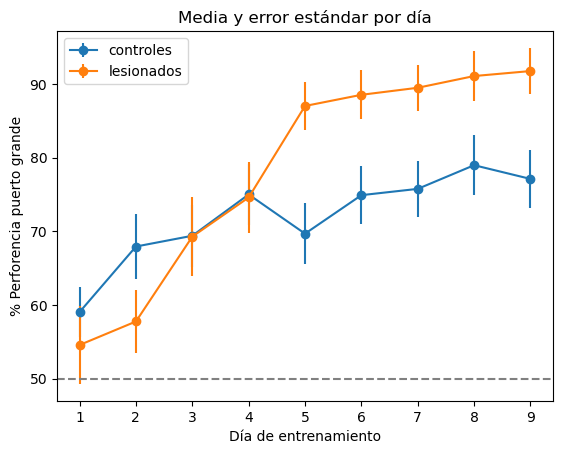

In [2]:
path = "C:/Users/bk_ri/Dropbox/Papaer JP OC/Excells para R"
os.chdir(path)
performance_todos = pd.read_excel('curva_aprendizaje.xlsx', header=None)

# Importamos los animales, los separamos en controles y lesionados
# sabiendo que los primeros 30 animales son controles, los siguientes 22, lesionados.

dias = np.arange(1, 10)
performance_ctl = performance_todos.iloc[0:31]
performance_lesion = performance_todos.iloc[31:]

# Y graficamos su performance

medias_ctl = np.mean(performance_ctl, axis=0)
se_ctl = np.std(performance_ctl, axis=0) / np.sqrt(performance_ctl.shape[0])

medias_lesion = np.mean(performance_lesion, axis=0)
se_lesion = np.std(performance_lesion, axis=0) / np.sqrt(performance_lesion.shape[0])



plt.errorbar(dias, medias_ctl.values, yerr=se_ctl.values, fmt='-o')
plt.errorbar(dias, medias_lesion.values, yerr=se_lesion.values, fmt='-o')
plt.xlabel('Día de entrenamiento')
plt.ylabel('% Perforencia puerto grande')
plt.title('Media y error estándar por día')
plt.legend(["controles", "lesionados"])
plt.axhline(50, ls='--', color='gray')
plt.show()

In [3]:
# los datos que importamos tiene la forma de una serie tempral o "wide", donde cada columna es un día, y cada fila un animal.
# Para el ANOVA y en general las librerias de modelos estadpísiticos prefieren el formato "largo" donde cada fila es un animal en un día.

performance_ctl_long = pd.melt(performance_ctl.reset_index(), id_vars='index', value_vars=performance_ctl.columns)
performance_ctl_long.columns = ['animal', 'dia', 'valor']

performance_lesion_long = pd.melt(performance_lesion.reset_index(), id_vars='index', value_vars=performance_lesion.columns)
performance_lesion_long.columns = ['animal', 'dia', 'valor']

In [4]:
# Veamos como era
performance_ctl

,0,1,2,3,4,5,6,7,8
0,11.764706,20.689655,60.000000,100.000000,31.818182,31.818182,52.941176,64.285714,31.818182
1,60.000000,21.428571,50.000000,90.909091,50.000000,83.333333,64.285714,100.000000,83.333333
2,64.285714,90.909091,90.909091,90.909091,76.923077,90.909091,83.333333,90.909091,76.923077
3,50.000000,83.333333,83.333333,44.444444,52.941176,76.923077,71.428571,100.000000,56.250000
4,60.000000,90.909091,44.444444,40.000000,44.444444,90.909091,100.000000,83.333333,100.000000
5,71.428571,90.909091,64.285714,83.333333,71.428571,71.428571,76.923077,71.428571,56.250000
6,56.250000,83.333333,76.923077,60.000000,64.285714,71.428571,23.076923,26.923077,44.444444
7,76.923077,76.923077,90.909091,100.000000,64.285714,52.941176,64.285714,90.909091,100.000000
8,71.428571,83.333333,100.000000,90.909091,90.909091,100.000000,100.000000,100.000000,100.000000
9,64.285714,83.333333,100.000000,90.909091,100.000000,100.000000,60.000000,100.000000,90.909091


In [5]:
# Veamos como quedó
performance_ctl_long

,animal,dia,valor
0,0,0,11.764706
1,1,0,60.000000
2,2,0,64.285714
3,3,0,50.000000
4,4,0,60.000000
...,...,...,...
274,26,8,64.285714
275,27,8,100.000000
276,28,8,60.000000
277,29,8,100.000000


In [6]:
# # le agregamos una columna "grupo" y un tag "C" o "L" a cada dataset segun corresponda.

performance_ctl_long = performance_ctl_long.assign(grupo=pd.Series(['C']*len(performance_ctl_long)).values)
performance_lesion_long = performance_lesion_long.assign(grupo=pd.Series(['L']*len(performance_lesion_long)).values)

# concatenamos los dataset, y les agregamos keys que señalen a qué grupo pertenecen, "control" o "lesion"
# performance_todos = pd.concat([performance_ctl_long, performance_lesion_long], keys=['control', 'lesion'])
performance_todos = pd.concat([performance_ctl_long, performance_lesion_long])
performance_todos


,animal,dia,valor,grupo
0,0,0,11.764706,C
1,1,0,60.000000,C
2,2,0,64.285714,C
3,3,0,50.000000,C
4,4,0,60.000000,C
...,...,...,...,...
193,48,8,100.000000,L
194,49,8,100.000000,L
195,50,8,100.000000,L
196,51,8,52.941176,L


In [8]:
import pingouin as pg
aov = pg.mixed_anova(dv='valor', within='dia', between='grupo', subject='animal', data=performance_todos)
# aov = pg.rm_anova(dv='valor', within=['grupo', 'dia'], subject='animal', data = performance_todos)
# model = pg.rm_anova(data=performance_todos, dv='valor', within=["dia", "grupo"], subject='animal')

C:\Users\bk_ri\AppData\Roaming\Python\Python310\site-packages\pingouin\parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)


In [9]:
pg.print_table(aov)


ANOVA SUMMARY

Source              SS    DF1    DF2        MS       F    p-unc    p-GG-corr    np2      eps    sphericity    W-spher    p-spher
-----------  ---------  -----  -----  --------  ------  -------  -----------  -----  -------  ------------  ---------  ---------
grupo         4526.650      1     51  4526.650   2.192    0.145      nan      0.041  nan           nan        nan        nan
dia          37084.836      8    408  4635.605  17.686    0.000        0.000  0.257    0.520         0.000      0.056      0.000
Interaction  10394.118      8    408  1299.265   4.957    0.000      nan      0.089  nan           nan        nan        nan



Efectivamente, tal como pensábamos, hay una interación entre los entrenamientos a lo largo del tiempo y el tratamiento que recibieron los animales.
Hagamos un post-hoc para ver dónde estan esas diferenicias.
Dado que los posthoc hacen comparaciones pareadas todos vs. todos, es recomendable hacer una correción del p-value por multiples comparaciones.
Miremos solo aquellas comparaciones cuyo p-value es sifnificativo.
Tambien, siendo que la interación fue significativa, mirar los post hoc de los efectos principales pierde un poco de sentido..

In [10]:
posthocs = pg.pairwise_tests(dv='valor', within='dia', between='grupo', subject='animal', data=performance_todos, padjust='bonf')
#posthocs[posthocs['p-unc']<=0.05] 
posthocs[(posthocs['p-unc']<=0.05) & (posthocs['Contrast']=='dia * grupo')] 

,Contrast,dia,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
41,dia * grupo,4,C,L,False,True,-3.239613,50.713644,two-sided,0.002115,0.019036,bonf,16.755,-0.829761
42,dia * grupo,5,C,L,False,True,-2.596533,50.988736,two-sided,0.012274,0.110464,bonf,4.099,-0.674378
43,dia * grupo,6,C,L,False,True,-2.743390,50.999969,two-sided,0.008371,0.075337,bonf,5.529,-0.710776
44,dia * grupo,7,C,L,False,True,-2.229820,50.998290,two-sided,0.030189,0.271704,bonf,2.065,-0.578311
45,dia * grupo,8,C,L,False,True,-2.840270,50.886707,two-sided,0.006465,0.058187,bonf,6.787,-0.730602


Se puede ver que los grupos se diferencian a partir del día 5! (dice 4 pero porque para el dataset dia 1 = 0)

Hay muchas decisiones que tomar. Con cuantos componentes principales nos quedamos? Una vez decidido esto, nos quedamos con las variables origiales, más amigables para interpretar, 
o transformamos nuestro dataset en el espacio recreado a partir de los componentes principales elegidos?

Nuevamente hay muchos argumentos a favor y en contra. Para abordar el primero de estos temas, podriamos decir que los criterios más usados son:

- Criterio de la varianza explicada: Podemos trazar la fracción de la varianza total explicada en función del número de componentes principales. 
Luego, podemos seleccionar el número de componentes principales donde la fracción de varianza explicada comienza a "nivelarse". 
Esto se puede hacer utilizando el método explained_variance_ratio_ en la clase PCA de scikit-learn.

- Criterio de la varianza acumulada: Podemos trazar la cantidad acumulada de varianza explicada en función del número de componentes principales. 
Luego, podemos seleccionar el número de componentes principales donde la cantidad acumulada de varianza explicada alcanza un umbral predefinido, por ejemplo, el 80% de la varianza total.

- Criterio del codo: Podemos trazar la magnitud de la varianza explicada en función del número de componentes principales. 
Luego, podemos seleccionar el número de componentes principales donde la magnitud de la varianza explicada comienza a "aplanarse" o formar un "codo".

Miremos un poco por arriba que pinta tienen:


In [19]:
# Definimos el escalador, que en este caso es MinMaxScaler para que lleve los valores entre 0 a 1 pero mantenga la relación entre los mismos.
# lo creo más conveniente que StandardScaler

df = pd.read_excel('dia9_cyl_conducta_raw.xlsx')

scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)
df_norm[0]

# y nos quedamos con los controles

df_ctl = df_norm[:31,:]
df_ctl = pd.DataFrame(df_ctl)

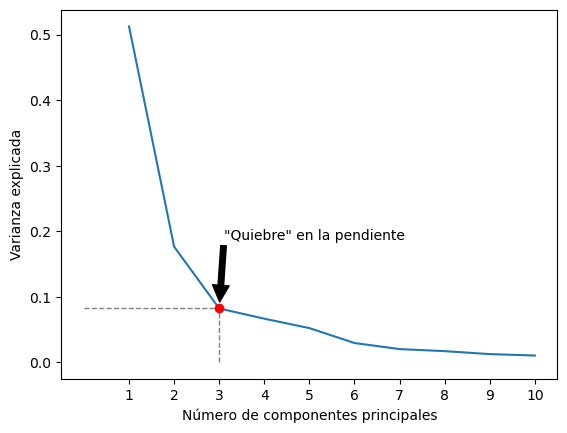

In [12]:
# Método del codo 

pca = PCA(n_components=10)
pca.fit(df_ctl)

variance = pca.explained_variance_ratio_


plt.plot(range(1, 11), variance)
plt.xlabel('Número de componentes principales')
plt.xticks(range(1, 11))
plt.ylabel('Varianza explicada')

point_x, point_y = 3, variance[2]
plt.scatter(point_x, point_y, color='red', zorder=2)
plt.vlines(point_x, ymin=0, ymax=point_y, colors='gray', linestyles='dashed', linewidth=1, zorder=1)
plt.hlines(point_y, xmin=0, xmax=point_x, colors='gray', linestyles='dashed', linewidth=1, zorder=1)

plt.annotate('"Quiebre" en la pendiente', xy=(point_x+0.01, point_y+0.01), xytext=(point_x+0.1, point_y+0.1),
             arrowprops=dict(facecolor='black', shrink=1),
             fontsize=10, color='black', horizontalalignment='left', verticalalignment='bottom')
plt.show()

# Nos quedamos con 3 componentes principales.
n_components = 3

pca = PCA(n_components=n_components)
# X_pca = pca.fit_transform(X)

In [13]:
# Método de varianza explicada

# obtener la proporción de varianza explicada por cada componente
# var_exp = pca.explained_variance_ratio_

# establecer el porcentaje deseado de varianza total explicada
desired_var_exp = 0.80

# establecer el número mínimo de componentes necesarios para alcanzar el porcentaje deseado
n_components = np.argmax(np.cumsum(variance) >= desired_var_exp) + 1
print(n_components)

# reducir la matriz de datos a los primeros n componentes principales
# X_reduced = PCA(n_components=n_components).fit_transform(X)

4


In [14]:
print(f'Si nos quedamos con los primeros 3 componentes, obtendremos una Varinza acumulada de {round(np.cumsum(variance[0:3])[2],4)*100}%')
print(f'Si nos quedamos con los primeros 4 componentes, obtendremos una Varinza acumulada de {round(np.cumsum(variance[0:4])[3],3)*100}%')

Si nos quedamos con los primeros 3 componentes, obtendremos una Varinza acumulada de 77.12%
Si nos quedamos con los primeros 4 componentes, obtendremos una Varinza acumulada de 83.8%


Ya con tres componentes explicamos el 77% de la varianza. Más aun el "criterio del codo" nos muestra que hay una desaceleración de la varianza explicada cuando pasamos a incorporar un 4to componente,
y más aún otros luego de él. Por lo que quizas, "quedarnos" con más componentes complejiza demasiado el problema y no nos aporta tanta información a cambio.

En la literatura es comun quedarse con dos o tres componentes, como máximo, muchas veces por la simplicidad de graficar los reusltados despues. Estamos mucho más acostumbrados a pensar problemas
en tres dimensiones que en más!

Ahora bien, seguimos ramificando nuestras decisiones! Ya definimos que nos quedaremos con 3 componentes principales pero como afecta esto nuestra matriz de variables de partida?

Hay dos grandes escuelas, o transformamos nuestros datos de partidas en este nuevo sistema de referencia que los tres ejes de PCA nos dan o los quedamos con las variables originales, pero solo con
aquellas que "más contribullan" a los componentes principales seleccioandos.

Hay pros y contras para cada una. 
En resumidas cuentas, transformar nuestras variables tiene la ventaja de que no se pierde información en el proceso de selección de variables. 
Además, permite encontrar patrones complejos en los datos que pueden no ser evidentes al observar las variables originales por separado.
Este enfoque también puede resultar en componentes que son difíciles de interpretar debido a que cada variable contribuye de manera diferente a cada componente principal.

Podemos quedarnos con aquella/as variable/es que más contribuyan a explicar la varianza 
Este enfoque es más fácil de interpretar porque solo se consideran las variables más importantes para cada componente principal. 
Naturalmente se pierde más información por que se truncan todas las variables que no se seleccionen.


Teniendo en cuenta que nuestra idea por la cual usamos PCA era reducir la dimencionalidad del problema, y que nos interesa mantener la identidad y transparencia de las variables que usemos para
un uso futuro, nos quedaremos con el segundo método.


que a su vez cubre cada componente principal, o podemos pasar a utilizar variables artificiales contruidas a partir de este nuevo sistema de referencia que el PCA establece. 
Por un cariño por la transparencia en la interprtacion de variables (entre otros motivos, algunos un poco más científicos), nos quedamos con la primera opción.

Ahora, ¿con cuantos componentes del PCA nos quedamos? ¿Con cuantas variables de cada componente? Una vez más, existen escuelas para esto. Vamos a ir explorándolos:


In [61]:
# Definamos una función que a partir de un numero de a partir de un dataset y evalue un n numero de componentes, y nos devuelva las m features que más contribuyen a cada componente

def selector_features_contribuyen_PCA (data, compontetes = 3, numero_features_por_componente = 1):
    pca = PCA(n_components=compontetes)
    pca.fit(data)
    lista_features = []

    # encontrar la característica que más contribuye a cada componente principal
    for i in range(compontetes):
        for j in range(numero_features_por_componente):
            component = pca.components_[i]
            max_feature_index = np.argmax(np.abs(component))
            lista_features.append(max_feature_index)
            print(f"La característica que más contribuye al componente {i+1} es la número {max_feature_index+1}, con un valor de {np.abs(component[i])}")
            component[max_feature_index] = -np.inf
    return lista_features
    

In [95]:
def selector_features_contribuyen_PCA (data, compontetes = 3, numero_features_por_componente = 1):
    pca = PCA(n_components=compontetes)
    pca.fit(data)
    lista_features = []

    # encontrar la característica que más contribuye a cada componente principal
    for i in range(compontetes):
        for j in range(1, numero_features_por_componente + 1):
            component = pca.components_[i]
            sorted_indices = np.argsort(np.abs(component))
            print(sorted_indices)
            # Obtenemos el segundo índice de mayor valor (el último en el arreglo ordenado)
            max_feature_index = sorted_indices[-j]

            lista_features.append(max_feature_index)
            print(f"La característica que más contribuye al componente {i+1} es la número {max_feature_index+1}, con un valor de {np.abs(component[i])}")
    return lista_features

In [107]:
lista_features = selector_features_contribuyen_PCA(df_ctl, compontetes = 3, numero_features_por_componente = 1)

[ 7  6  5  3 11 13 14 12  4  2 10  9  0 15  8  1]
La característica que más contribuye al componente 1 es la número 2, con un valor de 0.3595755532277075
[ 8  0  1 15 13  5  7 10  9  6 14  4 11 12  2  3]
La característica que más contribuye al componente 2 es la número 4, con un valor de 0.08344841351021107
[12  3  1  4  7  6 13  2  0 11  5 15  8 14 10  9]
La característica que más contribuye al componente 3 es la número 10, con un valor de 0.19362135274608538


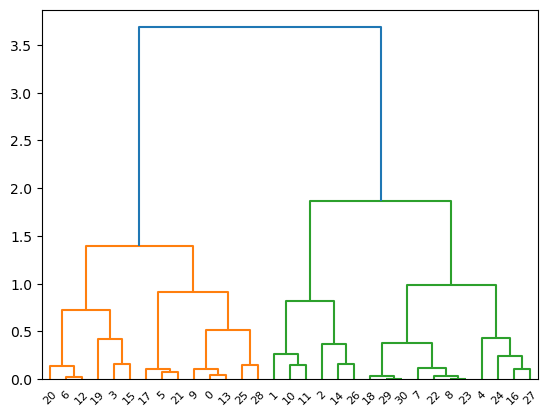

In [108]:
# calcular la matriz de distancias
columnas_seleccionadas = df_ctl.iloc[:, lista_features]

dist_matrix = linkage(columnas_seleccionadas, 'ward')

# crear el dendrograma
dendrogram(dist_matrix)

# mostrar el dendrograma
plt.show()

In [ ]:
lista_features = selector_features_contribuyen_PCA(df_ctl, compontetes = 3, numero_features_por_componente = 1)
lista_features = selector_features_contribuyen_PCA(df_ctl, compontetes = 3, numero_features_por_componente = 1)